# Step 1. Importing Required Dependencies for the Project

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

# Step 2. Imported the DataSet

In [ ]:
spotify_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Step 3. Doing Some Exploratory Data Analysis on the Dataset

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
spotify_df.rename(columns={'track_name': 'Tracks', 'artist(s)_name': 'Artists','artist_count': '# of Artists on Song','released_year': 'Year It Released','released_month': 'Month It Released','released_day': 'Day It Released','in_spotify_playlists': '# of Playlists The Song is in on Spotify','in_spotify_charts': 'Song Place in Spotify Charts','streams': '# of Streams the Song has','in_apple_playlists': '# of Playlists The Song is in on Apple Music','in_apple_charts': 'Song Place in Apple Music Charts','in_deezer_playlists': '# of Playlists the Song is in on Deezer','in_deezer_charts': 'Song Place in Deezer Charts','in_shazam_charts': 'Song Place in Shazam Charts','bpm': 'The BPM of the Song','key': 'The Key of The Song','mode': 'If the Key is in Major or Minor Scale','danceability_%': 'How Danacable the song is by %','valence_%': 'How Positive the Song is in %','energy_%': 'Energy Level of the Song in %','acousticness_%': 'How Much Acoustic Sound is in the Song in %','instrumentalness_%': 'How Instrumental the Song is in %','liveness_%': 'The presence of special live performance effects in %','speechiness_%': '# of words sung in the song in %',}, inplace=True)

In [ ]:
spotify_df.drop_duplicates(inplace=True)

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Tracks                                                 953 non-null    object
 1   Artists                                                953 non-null    object
 2   # of Artists on Song                                   953 non-null    int64 
 3   Year It Released                                       953 non-null    int64 
 4   Month It Released                                      953 non-null    int64 
 5   Day It Released                                        953 non-null    int64 
 6   # of Playlists The Song is in on Spotify               953 non-null    int64 
 7   Song Place in Spotify Charts                           953 non-null    int64 
 8   # of Streams the Song has                              953 n

In [ ]:
# Convert '# of Streams the Song has' to numeric, coercing errors to NaN
spotify_df['# of Streams the Song has'] = pd.to_numeric(spotify_df['# of Streams the Song has'], errors='coerce')

# Drop rows with NaN values in '# of Streams the Song has'
spotify_df.dropna(subset=['# of Streams the Song has'], inplace=True)

# Group by released_month and calculate the mean of relevant columns
monthly_trends = spotify_df.groupby('Month It Released')[['# of Streams the Song has', 'Energy Level of the Song in %', 'The presence of special live performance effects in %']].mean()

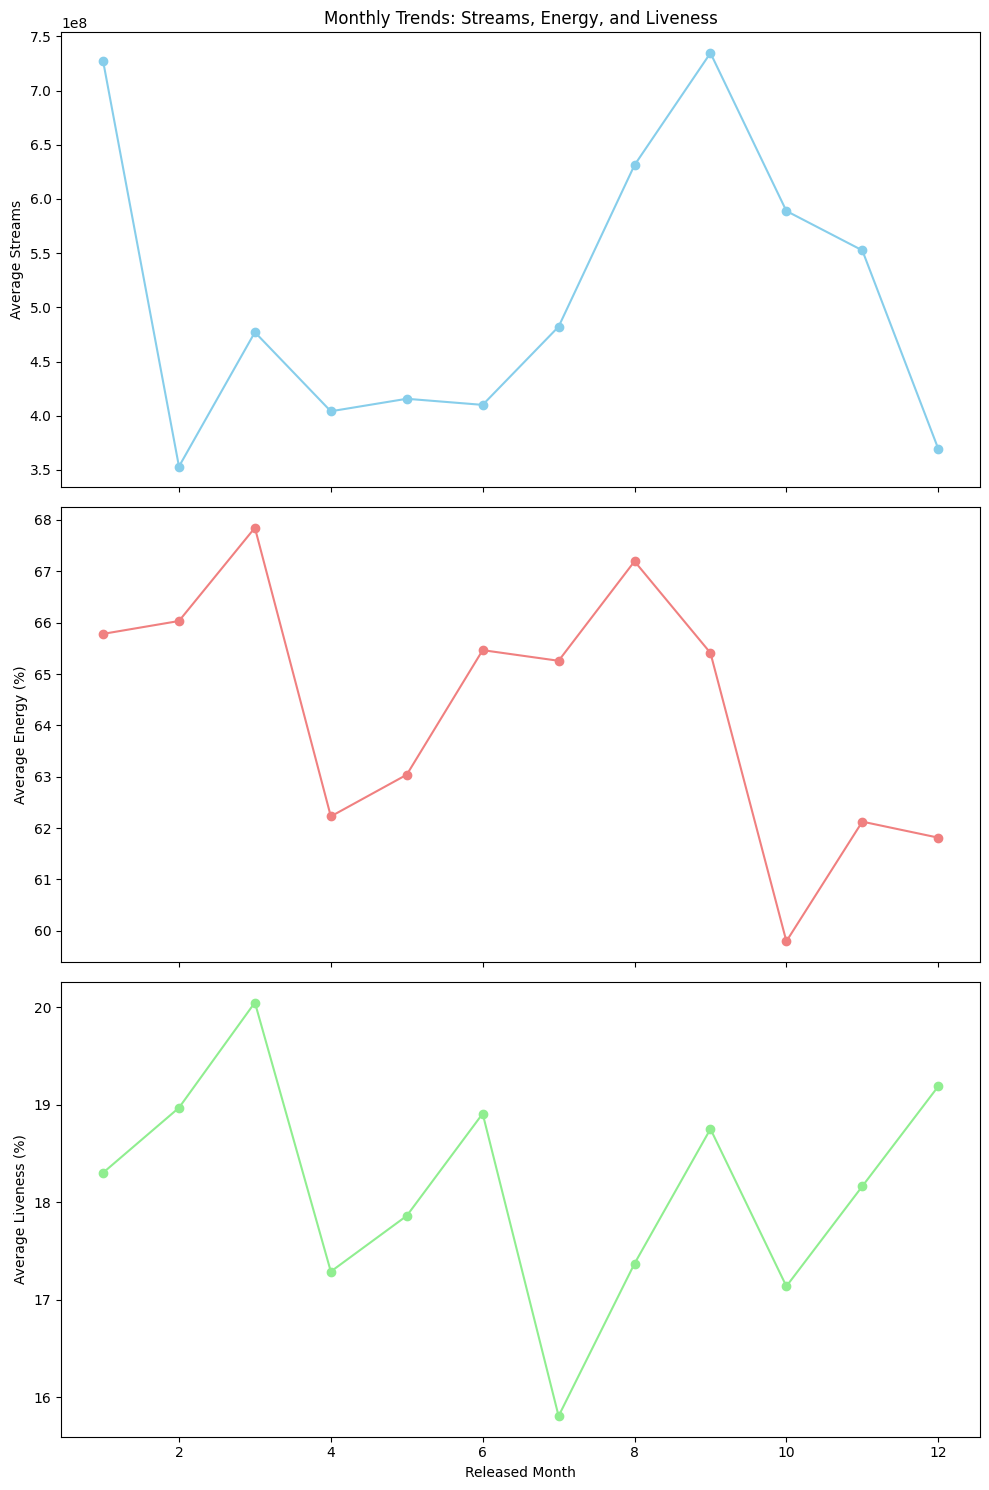

In [ ]:
import matplotlib.pyplot as plt

# Plot the graph
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Average Streams
axes[0].plot(monthly_trends.index, monthly_trends['# of Streams the Song has'], marker='o', color='skyblue')
axes[0].set_ylabel('Average Streams')
axes[0].set_title('Monthly Trends: Streams, Energy, and Liveness')

# Average Energy
axes[1].plot(monthly_trends.index, monthly_trends['Energy Level of the Song in %'], marker='o', color='lightcoral')
axes[1].set_ylabel('Average Energy (%)')

# Average Liveness
axes[2].plot(monthly_trends.index, monthly_trends['The presence of special live performance effects in %'], marker='o', color='lightgreen')
axes[2].set_ylabel('Average Liveness (%)')
axes[2].set_xlabel('Released Month')

# Finalize and show plot
plt.tight_layout()
plt.show()